In [1]:
# Import libraries
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
path = r'C:\Users\Admin\Documents\Career Foundry\Achievement 6\Data'
df = pd.read_csv(os.path.join(path,'pip_dataset.csv'))
df = df.sort_values('year').groupby('country').last().reset_index()
# Rename columns to be more concise for the correlation matrix
selected_df = df[['year',
    'gini',
    'headcount_ratio_international_povline',
    'headcount_ratio_upper_mid_income_povline',
    'poverty_gap_index_international_povline',
    'polarization',
    'mld',
    'palma_ratio',
    'mean',
    'median',
    'decile10_share',
    'decile1_share'
]].copy()

# Calculate the decile ratio
selected_df['decile_ratio'] = selected_df['decile10_share'] / selected_df['decile1_share']

# Drop the individual decile share columns since we've calculated our ratio
selected_df = selected_df.drop(['decile10_share', 'decile1_share'], axis=1)

# Rename columns to be more concise for the correlation matrix
df = selected_df.rename(columns={
    'headcount_ratio_international_povline': 'extreme_poverty_rate',
    'headcount_ratio_upper_mid_income_povline': 'middle_poverty_rate',
    'poverty_gap_index_international_povline': 'poverty_gap'
})
df.head()

,year,gini,extreme_poverty_rate,middle_poverty_rate,poverty_gap,polarization,mld,palma_ratio,mean,median,decile_ratio
0,2019,0.307717,0.000000,9.962062,0.000000,0.274892,0.154626,1.132010,12.905641,10.831646,6.998040
1,2011,0.276157,0.455468,36.574951,0.153043,0.226046,0.125331,0.992916,9.225503,8.043640,5.650578
2,2018,0.512721,31.122006,77.974702,11.932581,0.470982,0.477890,3.465666,5.482151,3.420551,29.803074
3,2020,0.423433,1.074727,14.084597,0.330228,0.411175,0.320525,2.113704,22.843547,17.233385,17.342274
4,2020,0.251717,0.388135,53.454031,0.057117,0.201860,0.104231,0.875969,7.469615,6.624779,4.918630


In [3]:
# First, let's see how many NaN values we have in each variable
print("NaN values in Gini:", df['gini'].isna().sum())
print("NaN values in Extreme Poverty Rate:", df['extreme_poverty_rate'].isna().sum())
print("NaN values in Middle Poverty Rate:", df['middle_poverty_rate'].isna().sum())
print("NaN values in Poverty Gap:", df['poverty_gap'].isna().sum())
print("NaN values in Polarization:", df['polarization'].isna().sum())
print("NaN values in mld:", df['mld'].isna().sum())
print("NaN values in Palma Ratio:", df['palma_ratio'].isna().sum())
print("NaN values in Mean:", df['mean'].isna().sum())
print("NaN values in Median:", df['median'].isna().sum())
print("NaN values in Decile Ratio:", df['decile_ratio'].isna().sum())

NaN values in Gini: 8
NaN values in Extreme Poverty Rate: 0
NaN values in Middle Poverty Rate: 0
NaN values in Poverty Gap: 0
NaN values in Polarization: 8
NaN values in mld: 8
NaN values in Palma Ratio: 9
NaN values in Mean: 0
NaN values in Median: 0
NaN values in Decile Ratio: 9


In [4]:
# Create a clean dataset by removing rows where either variable is NaN
clean_df = df.dropna(subset=['gini', 'polarization','mld','palma_ratio','decile_ratio'])
df_new = clean_df[np.isfinite(df).all(1)]

C:\Users\Admin\AppData\Local\Temp\ipykernel_43988\1173471263.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = clean_df[np.isfinite(df).all(1)]


In [5]:
# Define the number of potential clusters in the data
clusters = range(1,10)

In [6]:
# Define a list of inertia values for each k-means clustering model
inertia = []
for i in clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_new)
    inertia.append(kmeans.inertia_)

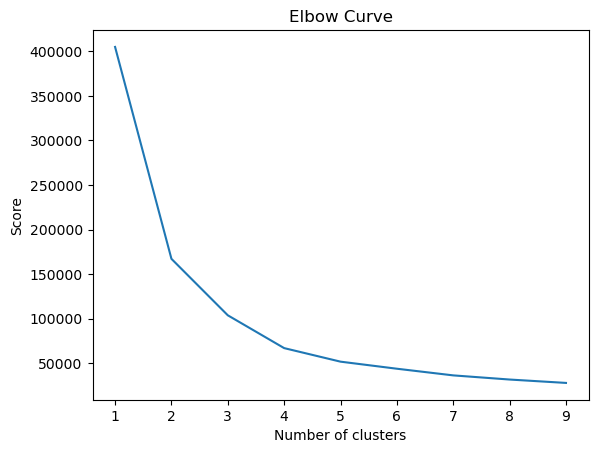

In [7]:
# Plot the scores to visualize the 'elbow'
pl.plot(clusters,inertia)
pl.title('Elbow Curve')
pl.xlabel('Number of clusters')
pl.ylabel('Score')
pl.show()

The curve begins to flatten out around 5 clusters, which means that the reduction in score becomes less significant. I will use 5 clusters for this dataset.

In [8]:
# Create the kmeans object
Kmeans = KMeans(n_clusters=5)

In [9]:
# Fit the k-means object to the dataframe
Kmeans.fit(df_new)

KMeans(n_clusters=5)

In [10]:
# Creating new column in dataframe to show the clusters
df_new['clusters'] = Kmeans.fit_predict(df_new)
df_new.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_43988\3785494864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['clusters'] = Kmeans.fit_predict(df_new)


,year,gini,extreme_poverty_rate,middle_poverty_rate,poverty_gap,polarization,mld,palma_ratio,mean,median,decile_ratio,clusters
0,2019,0.307717,0.000000,9.962062,0.000000,0.274892,0.154626,1.132010,12.905641,10.831646,6.998040,0
1,2011,0.276157,0.455468,36.574951,0.153043,0.226046,0.125331,0.992916,9.225503,8.043640,5.650578,4
2,2018,0.512721,31.122006,77.974702,11.932581,0.470982,0.477890,3.465666,5.482151,3.420551,29.803074,2
3,2020,0.423433,1.074727,14.084597,0.330228,0.411175,0.320525,2.113704,22.843547,17.233385,17.342274,0
4,2020,0.251717,0.388135,53.454031,0.057117,0.201860,0.104231,0.875969,7.469615,6.624779,4.918630,4


In [11]:
df_new['clusters'].value_counts()

clusters
2    44
0    43
4    39
3    29
1    12
Name: count, dtype: int64

# Scatterplots

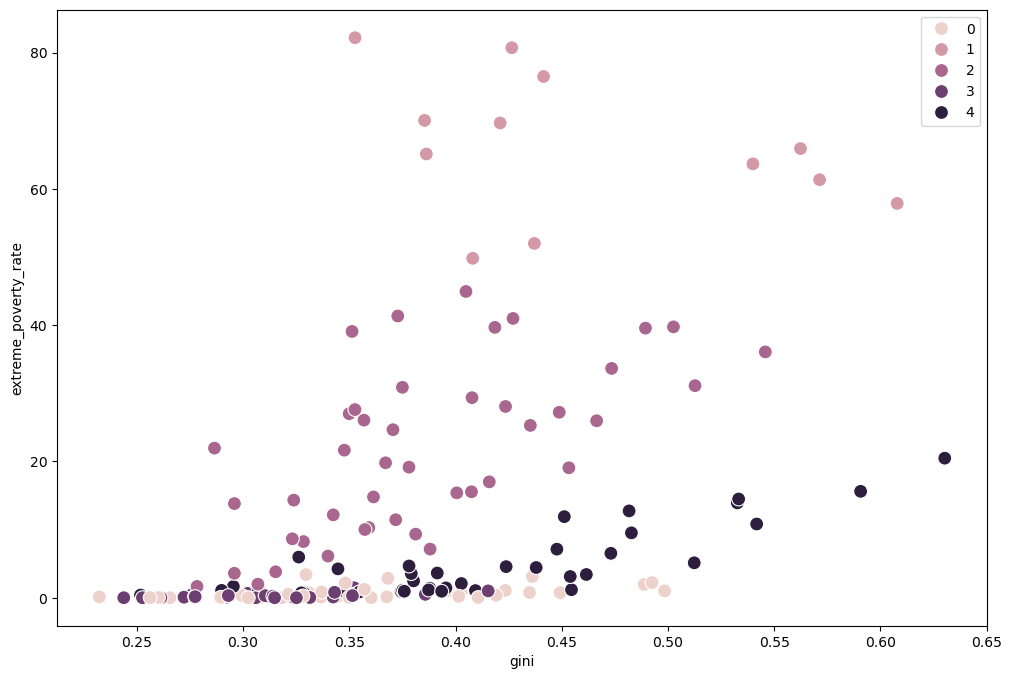

In [12]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['gini'], y=df_new['extreme_poverty_rate'], hue = Kmeans.labels_, s=100)
plt.savefig('gini_extreme_poverty_scatterplot_clusters.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

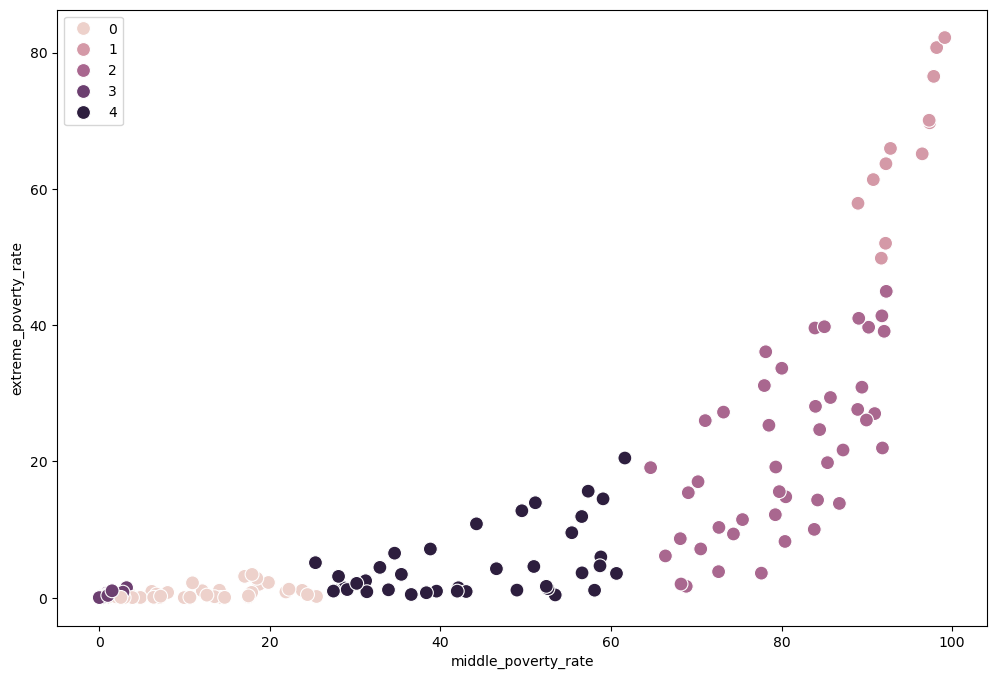

In [13]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['middle_poverty_rate'], y=df_new['extreme_poverty_rate'], hue = Kmeans.labels_, s=100)
plt.savefig('poverty_rates_scatterplot_clusters.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

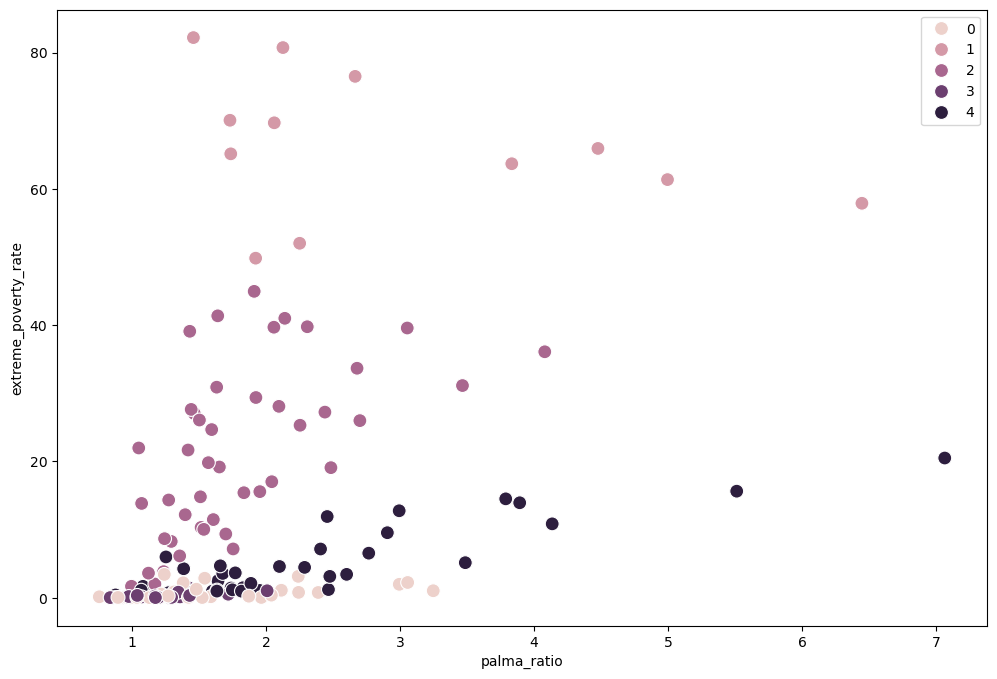

In [14]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['palma_ratio'], y=df_new['extreme_poverty_rate'], hue = Kmeans.labels_, s=100)
plt.savefig('palma_extreme_poverty_scatterplot_clusters.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

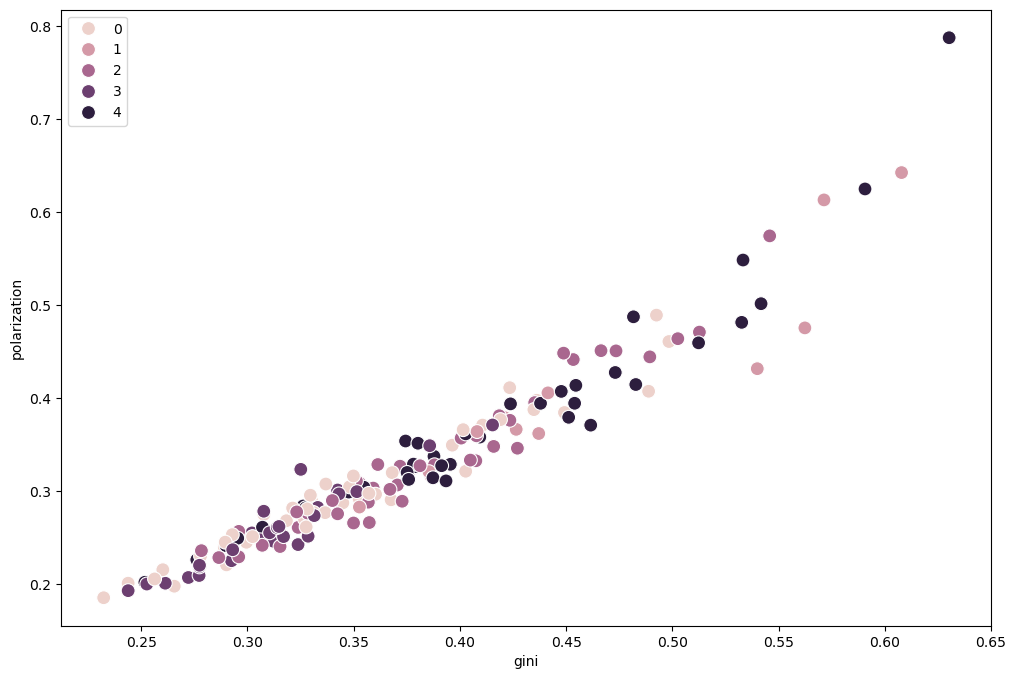

In [15]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['gini'], y=df_new['polarization'], hue = Kmeans.labels_, s=100)
plt.savefig('gini and polarization_scatterplot_clusters.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

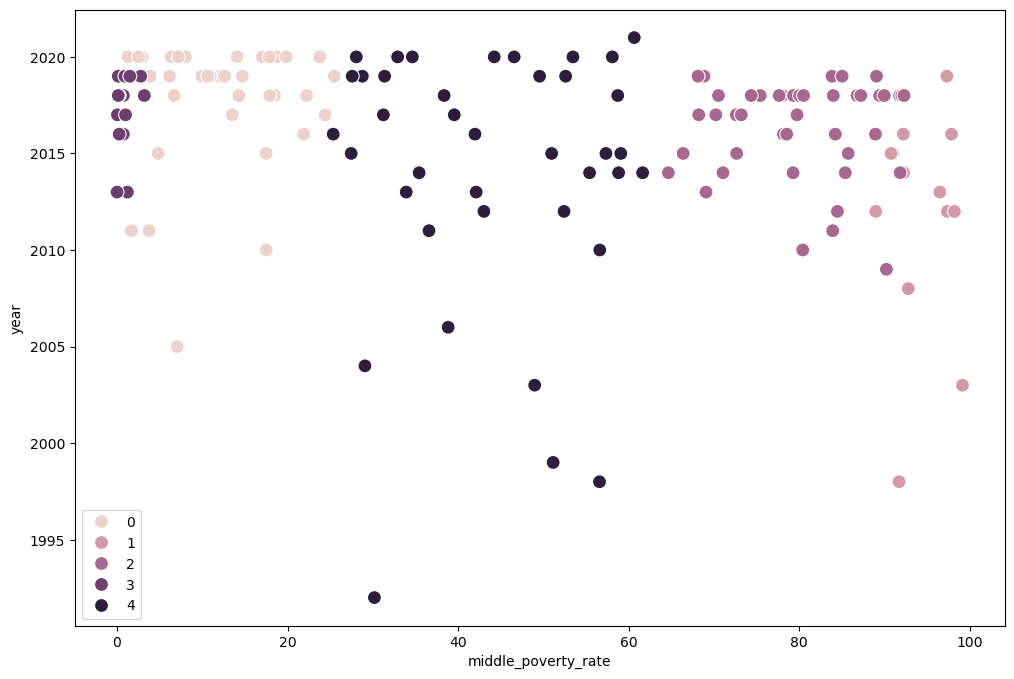

In [16]:
# Visualize the clusters in a scatterplot
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_new['middle_poverty_rate'], y=df_new['year'], hue = Kmeans.labels_, s=100)
plt.savefig('mittle_rate_year_scatterplot_clusters.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

In [17]:
# Calculate descriptive statistics for each cluster
df_new.loc[df_new['clusters'] == 4, 'clusters'] = 'dark purple'
df_new.loc[df_new['clusters'] == 3, 'clusters'] = 'light purple'
df_new.loc[df_new['clusters'] == 2, 'clusters'] = 'pink'
df_new.loc[df_new['clusters'] == 1, 'clusters'] = 'peach'
df_new.loc[df_new['clusters'] == 0, 'clusters'] = 'light pink'

descriptive = df_new.groupby('clusters').agg({
    'gini': ['mean', 'median'], 
    'extreme_poverty_rate': ['mean', 'median'], 
    'middle_poverty_rate': ['mean', 'median'], 
    'poverty_gap': ['mean', 'median'],
    'polarization': ['mean', 'median'],
    'mld': ['mean', 'median'],
    'palma_ratio': ['mean', 'median'],
    'mean': ['mean', 'median'],
    'median': ['mean', 'median'],
    'decile_ratio': ['mean', 'median']
})
#export selected data frame
descriptive.to_csv(os.path.join(path,'descriptive_stats_summary.csv'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_43988\3074324114.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'dark purple' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_new.loc[df_new['clusters'] == 4, 'clusters'] = 'dark purple'



**Dark Purple Cluster:**
- Moderate inequality (Gini ≈ 0.35)
- Very low extreme poverty (< 1%)
- Low middle poverty rate (≈ 11%)
- Low poverty gap (≈ 0.22)
- Moderate polarization and economic concentration

**Light Pink Cluster:**
- High inequality (Gini ≈ 0.46)
- Very high extreme poverty (≈ 66%)
- Extremely high middle poverty (≈ 95%)
- Severe poverty gap (≈ 31%)
- Highest Palma ratio (≈ 3.0)

**Light Purple Cluster:**
- Moderate-high inequality (Gini ≈ 0.38)
- Significant extreme poverty (≈ 21%)
- Very high middle poverty (≈ 80%)
- Moderate poverty gap (≈ 6.3%)

**Peach Cluster:**
- High inequality (Gini ≈ 0.41)
- Moderate extreme poverty (≈ 5%)
- Significant middle poverty (≈ 44%)
- Low poverty gap (≈ 1.6%)

**Pink Cluster:**
- Lowest inequality (Gini ≈ 0.32)
- Very low extreme poverty (≈ 0.3%)
- Minimal middle poverty (< 1%)
- Very low poverty gap (≈ 0.19)
- Lowest Palma ratio (≈ 1.2)
\
The clusters show a clear progression from most advantaged (pink) to most disadvantaged (light pink) economies, with varying combinations of poverty and inequality measures helping to distinguish between different levels of economic development.

In [18]:
#export selected data frame
df_new.to_csv(os.path.join(path, 'Data','clusters_selected_data.csv'))